<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Logotipo_Ikiam.png/1200px-Logotipo_Ikiam.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Gómez Piguave Akira Elizabeth** 

**03-08-2022**

**Cédula: 1312552795**
**Celular  : 0990051893**
**Lugar de nacimiento: Manta**
**Carrera: Biotecnología**

In [6]:
import pandas as pd
import numpy as np 
import matplotlib as mp # graficos 
import seaborn as sb # estadistica y visualizacion
Caracteristicas_del_computador = pd.DataFrame({'Caracteristicas del computador' : ["AMD Ryzen 5 4500U ", "Radeon Graphics 2.38 GHz", "64 bits"]}, index=['Procesador', 'Grafica', 'Sistema operativo'])
Caracteristicas_del_computador

,Caracteristicas del computador
Procesador,AMD Ryzen 5 4500U
Grafica,Radeon Graphics 2.38 GHz
Sistema operativo,64 bits


<font color='red'>Color de texto</font>


### REQUERIMIENTOS PARA EL EXAMEN

Utilice de preferencia ```Jupyter``` de Anaconda, dado que tienen que hacer un control de cambios en cada pregunta. 

Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2022I_GBI6_ExamenPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 0 [0.5 puntos]


- Coloque sus datos personales 
- Escriba una **tabla** con las características de su computador 



# Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```map_science```: para su data replique el ejemplo de [MapOfScience](https://github.com/CSB-book/CSB/blob/master/regex/solutions/MapOfScience_solution.ipynb), donde los puntos resaltados son al menos 5 países

iii *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e **imprima docstring de cada función**.


In [7]:
# Escriba aquí su código para el ejercicio 1
import miningscience as mcs 

In [8]:
?mcs.map_science

In [9]:
?mcs.download_pubmed


## Ejercicio 2 [2 puntos]


Utilice dos veces la función ```download_pubmed``` para: 

- Descargar la data, utilizando los keyword de su preferencia. 
- Guardar el archivo descargado en la carpeta ```data```.

Para cada corrida, imprima lo siguiente: 

```python
'El número artículos para KEYWORD es: XX' # Que se cargue con inserción de texto o valor que correspondea KEYWORD y XX
```

In [13]:
journals = mcs.download_pubmed("shrimp")
print ("El numero de articulos es:", len(journals))

El numero de articulos es: 20


In [14]:
# Escriba aquí su código para el ejercicio 2


## Ejercicio 3 [1.5 puntos]

Utilice dos veces la función ```map_science``` para: 

- Visualizar un mapa para cada data descargada en el ejercicio 2.
- Guardar los mapas en la carpeta ```img```

In [ ]:
# Escriba aquí su código para el ejercicio 3
miningscience.map_science("data/pubmed_results.txt")

## Ejercicio 4 [1 punto]

**Interprete** los resultados de las figuras del **ejercicio 3**

Argentina es el país que más paper científicos tiene.

## Ejercicio 5 [2 puntos]

Para algún **gen de interés** (podría usar [Lista de genes por tipología](https://www.genome.jp/kegg/pathway.html#metabolism)), realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda y guarde en la carpeta ```data```.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de las secuencias de los **quince primeros** IDs de la accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Guarde su arbol filogénetico en la carpeta ```img```

5. Interprete el árbol del paso 4. 

In [30]:
# Escriba aquí su código para el ejercicio
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Entrez
from Bio import SeqIO
from Bio import GenBank 
import csv 
import re 
import matplotlib
import matplotlib.pyplot as plt
with open("secuencia.seq", errors="ignore") as file: 
     texto_1 = file.read()
accession = texto_1.split("\n")
Entrez.email="A.N.Other@example.com"
archivo = open("secuence.Exam.txt", "w")
for i in accession[0:15]:  
    handle=Entrez.efetch(db="nuccore", id=i, rettype="fasta")
    archivo.write(handle.read())


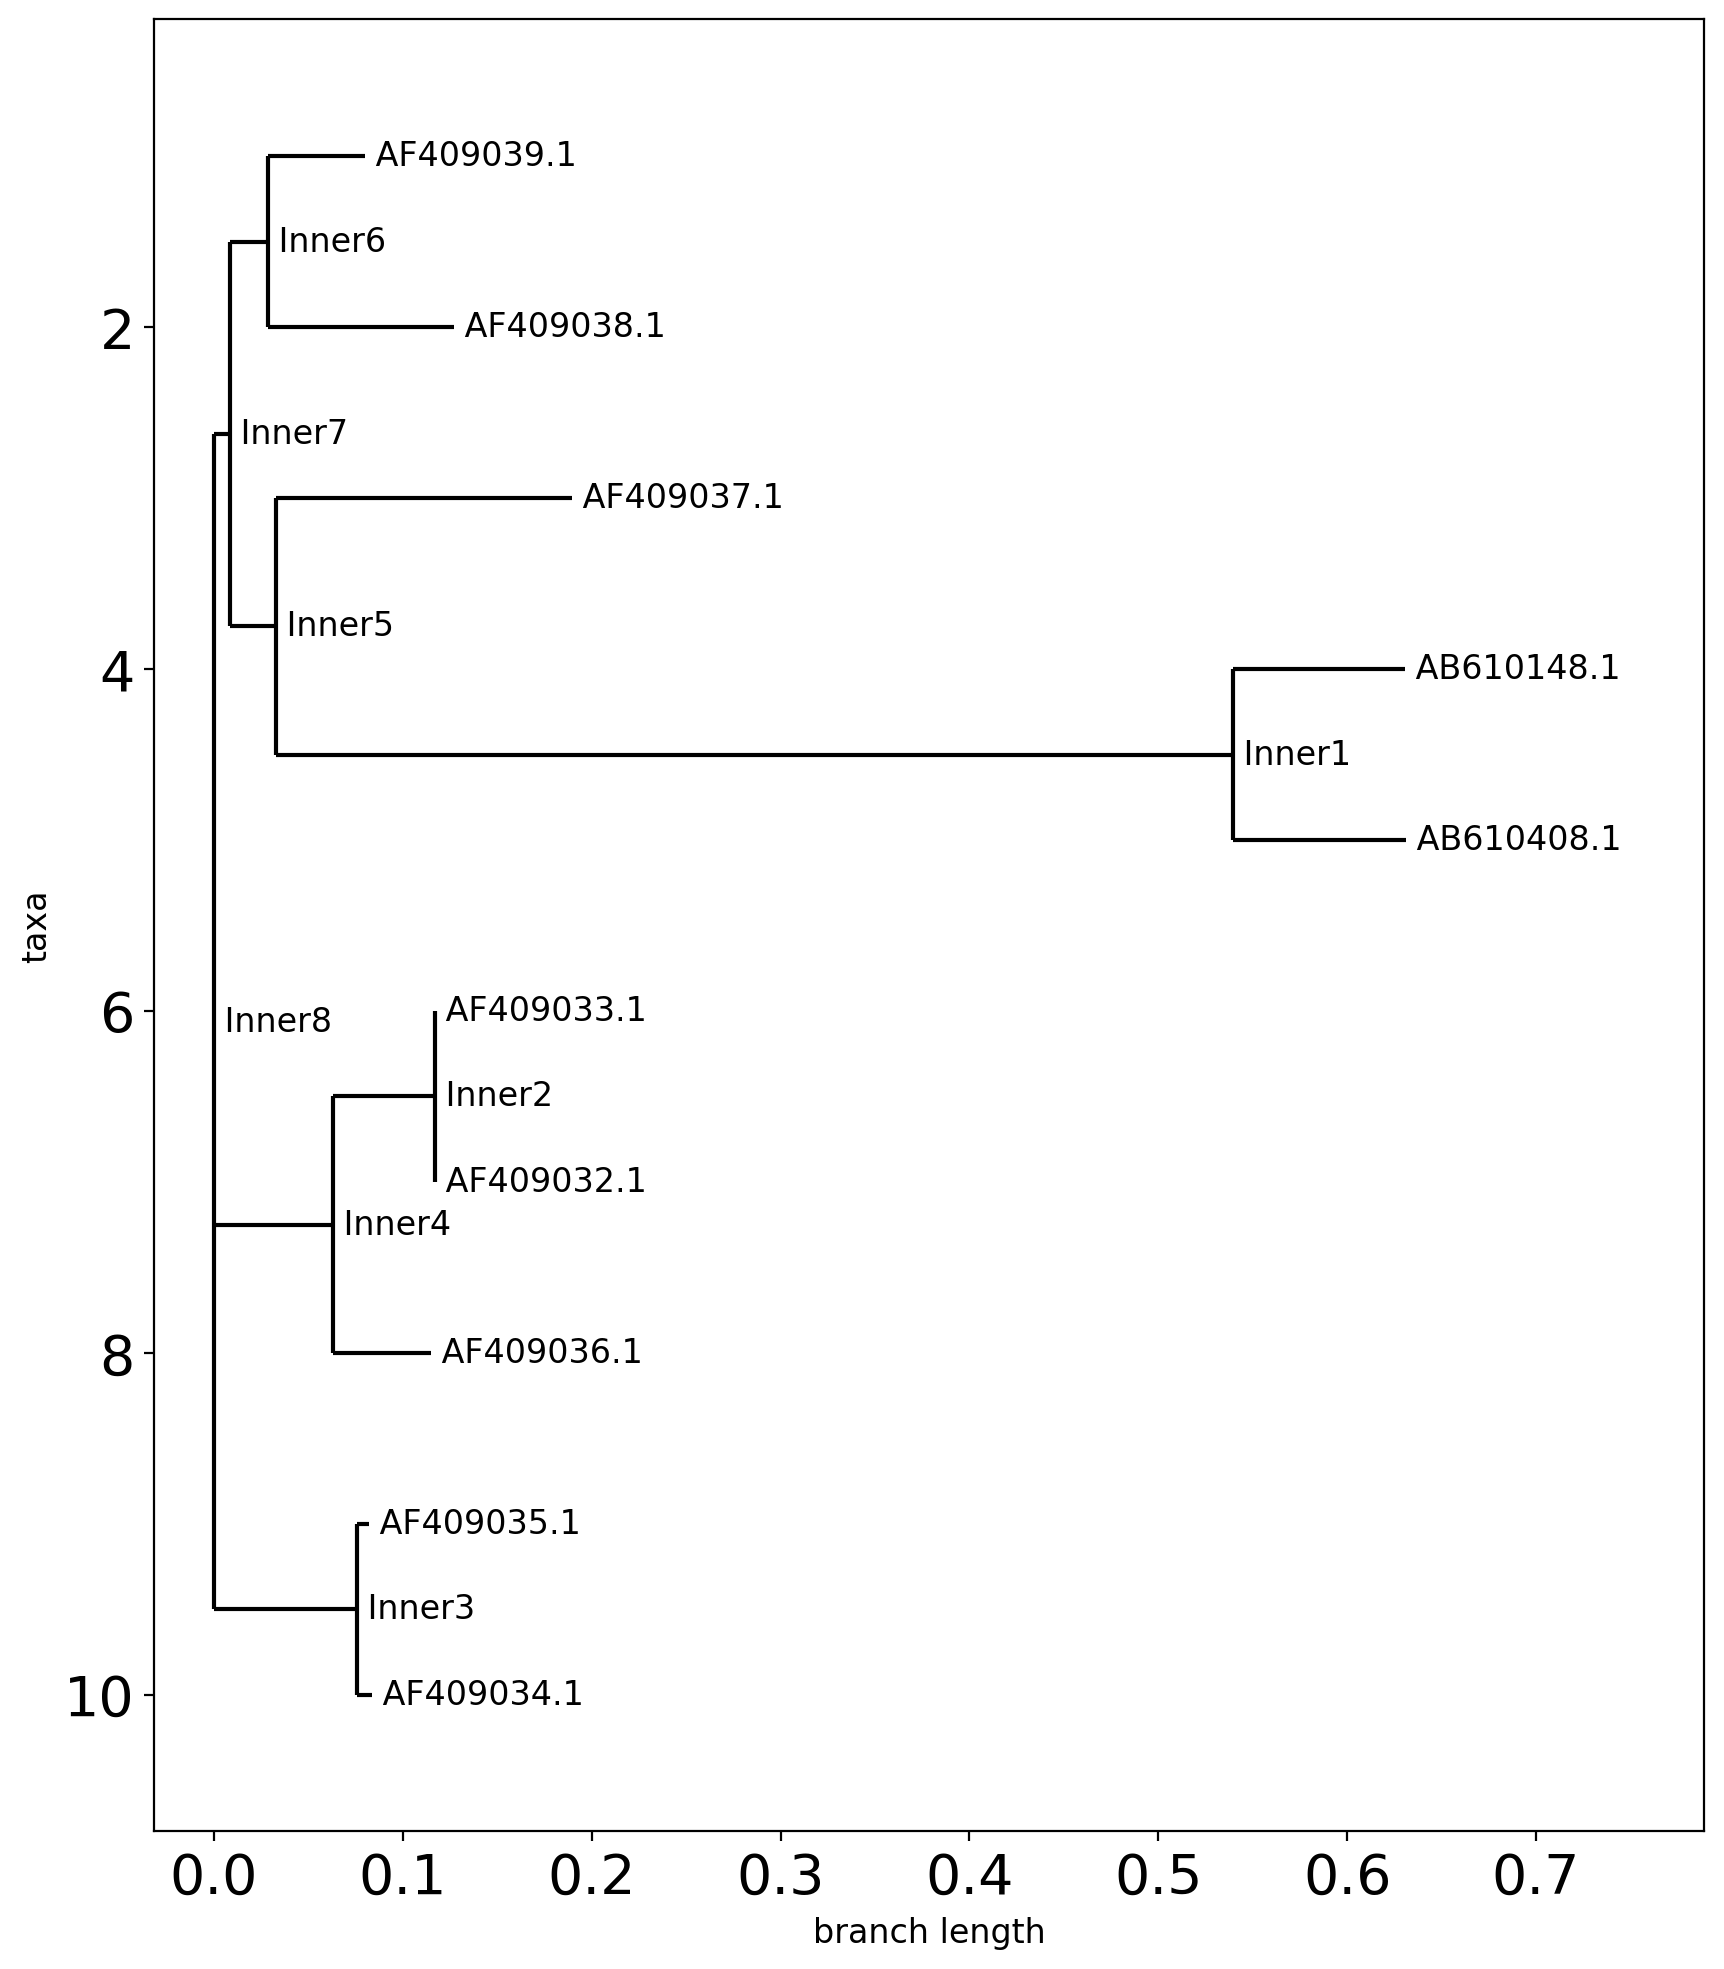

In [32]:
with open("seq_alim.txt", "r") as f: 
    alignment = AlignIO.read(f, "clustal")
calculator = DistanceCalculator("identity")
distance_matriz = calculator.get_distance(alignment)
constructor = DistanceTreeConstructor(calculator)
tree = constructor.build_tree(alignment)
tree.rooted = True
fig = plt.figure(figsize=(10, 12), dpi=200) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=20)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=20)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes)
fig.savefig("img/tree.jpg")

**Escriba aquí la interpretación del árbol** 

**Un árbol filogenético enraizado es un árbol directo, con un único nódulo que corresponde al ancestro común más reciente de todas las entidades de las hojas del árbol.** 

## Ejercicio 6 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada
- Un diagrama de procesos del módulo ```miningscience```
3. Asegurarse que su repositorio tiene las carpetas ```data``` e ```img``` con los archivos que ha ido guardando en las preguntas anteriores.  
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 5), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado el ejercicio 1  
```
```sh 
Carlitos Alimaña ha realizado el ejercicio 2
```
```sh 
...
```
